<a href="https://colab.research.google.com/github/Jeruza2021/simulador_Nivel-4/blob/main/simulador_Nivel4_corrigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo os dados dos 25 primeiros filmes






In [ ]:
import requests
from requests import HTTPError
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL = 'https://www.imdb.com/chart/top/'

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [ ]:
try:
  response = requests.get(URL, headers=headers)
  response.raise_for_status()
  conteudo = response.content
  print("Conteudo coletado com sucesso!")
except Exception as err:
  print("Deu erro!")

Conteudo coletado com sucesso!


In [ ]:
pagina = BeautifulSoup(conteudo, 'html.parser')

print("HTML carregado com sucesso!")

HTML carregado com sucesso!


In [ ]:
# Criando uma lista para armazenar os detalhes de cada filme
lista_filmes = []

# Encontrando todos os elementos que contêm os títulos dos filmes
titulos = pagina.find_all('a', class_='ipc-title-link-wrapper')

# Extraindo o conteúdo dos filmes
for titulo in titulos:
    # Extraindo o título do filme (usando o <h3>)
    nome_filme = titulo.find('h3', class_='ipc-title__text').get_text(strip=True)

    # Extraindo o ano, a duração e a classificação indicativa
    pai = titulo.find_parent('li', class_='ipc-metadata-list-summary-item')

    metadata_elemento = pai.find('div', class_='sc-b189961a-7 btCcOY cli-title-metadata')

    info_details = pai.find_all('span', class_='cli-title-metadata-item')

    if info_details and len(info_details) >= 3:
        ano = info_details[0].get_text(strip=True)
        duracao = info_details[1].get_text(strip=True)
        classificacao = info_details[2].get_text(strip=True)
    else:
        year = None
        duration = None
        classificacao = None

    nota = pai.find('span', class_='ipc-rating-star--rating').get_text(strip=True)

    # Criando um dicionário com as informações do filme
    filmes_info = {
        'Título': nome_filme,
        'Ano': ano,
        'Duração': duracao,
        'Classificação Indicativa': classificacao,
        'Nota': nota
    }

    # Adicionando o dicionário à lista de filmes
    lista_filmes.append(filmes_info)

# Criando um DataFrame (Pandas) para melhor exibição
df_filmes = pd.DataFrame(lista_filmes)


# Pegando os 25 primeiros filmes



In [ ]:
df_filmes.head(25)

,Título,Ano,Duração,Classificação Indicativa,Nota
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3
1,2. The Godfather,1972,2h 55m,R,9.2
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0
3,4. The Godfather Part II,1974,3h 22m,R,9.0
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0
5,6. The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0
6,7. Schindler's List,1993,3h 15m,R,9.0
7,8. Pulp Fiction,1994,2h 34m,R,8.9
8,9. The Lord of the Rings: The Fellowship of th...,2001,2h 58m,PG-13,8.9
9,"10. The Good, the Bad and the Ugly",1966,2h 58m,R,8.8


criando outros


# Contando quantos filmes foram lançados em cada ano

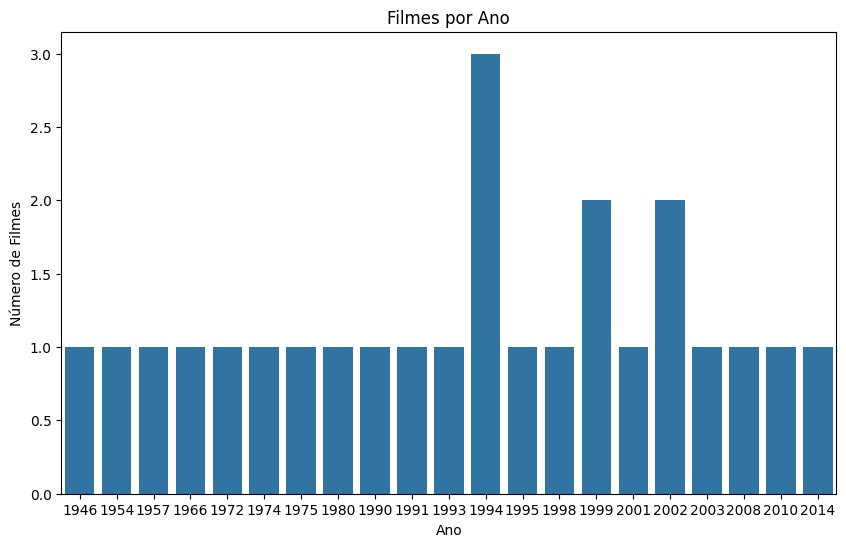

In [ ]:
 # Numero de filmes por anos
filmes_por_ano = df_filmes.groupby('Ano')['Título'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Ano', y='Título', data=filmes_por_ano)
plt.title('Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.show()

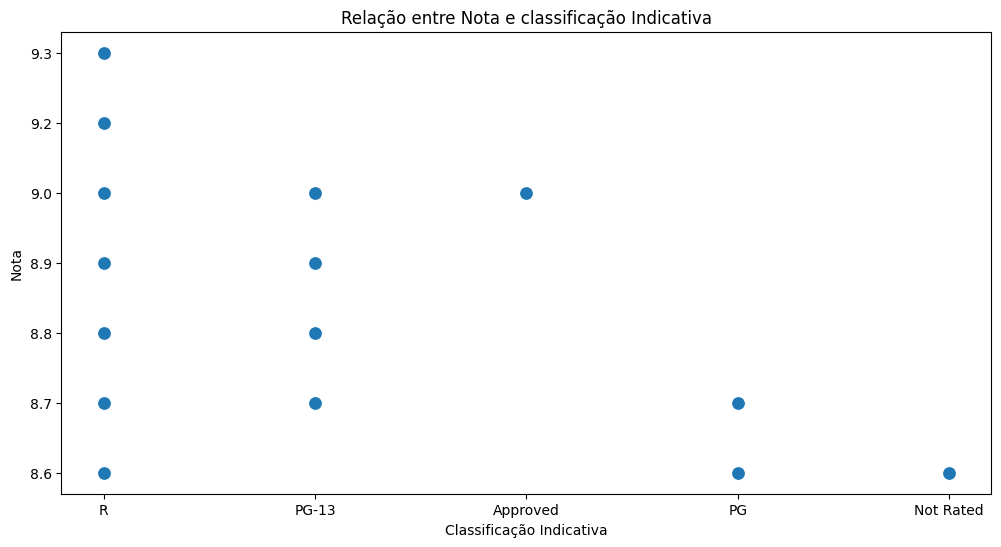

In [ ]:
#Classificação Indicativa
plt.figure(figsize=(12,6))
sns.scatterplot(x='Classificação Indicativa', y='Nota', data=df_filmes, s=100)
plt.title('Relação entre Nota e classificação Indicativa')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Nota')
plt.show()

xxxxxxxxxxx


 # Pegando as notas



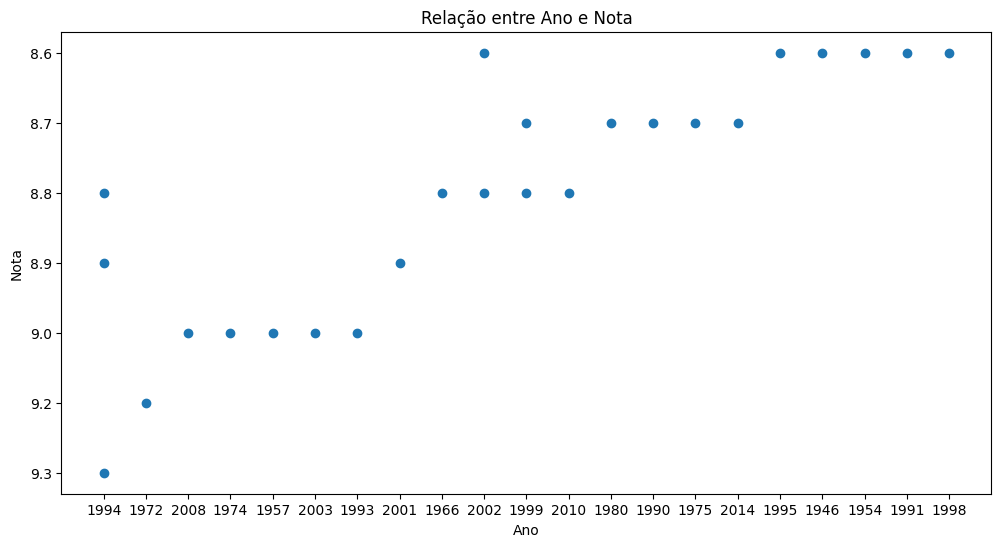

In [ ]:
# Gráfico de dispersão: Ano vs Nota
plt.figure(figsize=(12, 6))
plt.scatter(df_filmes['Ano'], df_filmes['Nota'])
plt.title('Relação entre Ano e Nota')
plt.xlabel('Ano')
plt.ylabel('Nota')
plt.show()

## Carregar Dados

In [ ]:
# Carregar a base de dados
df_nba = pd.read_csv('simulador_nivel4.csv')
df_nba.head()

NameError: name 'pd' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_nba.dtypes

,0
full_name,object
rating,int64
jersey,object
team,object
position,object
b_day,object
height,object
weight,object
salary,object
country,object


In [ ]:
# Copia do DataFrame para evitar modificações no original
df_nba_tratado = df_nba.copy()

# Converter a coluna 'b_day' para datetime e calcular a idade
df_nba_tratado['b_day'] = pd.to_datetime(df_nba_tratado['b_day'], format='%m/%d/%y', errors='coerce')
df_nba_tratado['Idade'] = (datetime.now().year - df_nba_tratado['b_day'].dt.year).fillna(0).astype(int)

# Extrair a altura da coluna 'height'
df_nba_tratado['Altura (m)'] = df_nba_tratado['height'].str.split('/').str[1].astype(float)

# Criar uma nova coluna 'Peso (Kg)' com os valores numéricos extraídos da coluna 'weight'
df_nba_tratado['weight'] = df_nba_tratado['weight'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x))[0] if re.findall(r'\d+\.?\d*', str(x)) else None)
df_nba_tratado['Peso (kg)'] = df_nba_tratado['weight'].astype(float) * 0.453592
df_nba_tratado['Peso (kg)'] = df_nba_tratado['Peso (kg)'].round(1)

# Converter "salary" para numérico
df_nba_tratado['salary'] = df_nba_tratado['salary'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x))).astype(float)

# Exibir o DataFrame tratado
df_nba_tratado.head()


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,Idade,Altura (m),Peso (kg)
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250,37436858.0,USA,2003,1,1,NaN,40,2.06,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225,32742000.0,USA,2011,1,15,San Diego State,33,2.01,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242,25842697.0,Greece,2013,1,15,NaN,30,2.11,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230,37199000.0,USA,2007,1,2,Texas,36,2.08,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220,38199000.0,USA,2009,1,3,Arizona State,35,1.96,99.8


In [ ]:
df_nba_tratado.dtypes

,0
full_name,object
rating,int64
jersey,object
team,object
position,object
b_day,datetime64[ns]
height,object
weight,object
salary,float64
country,object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


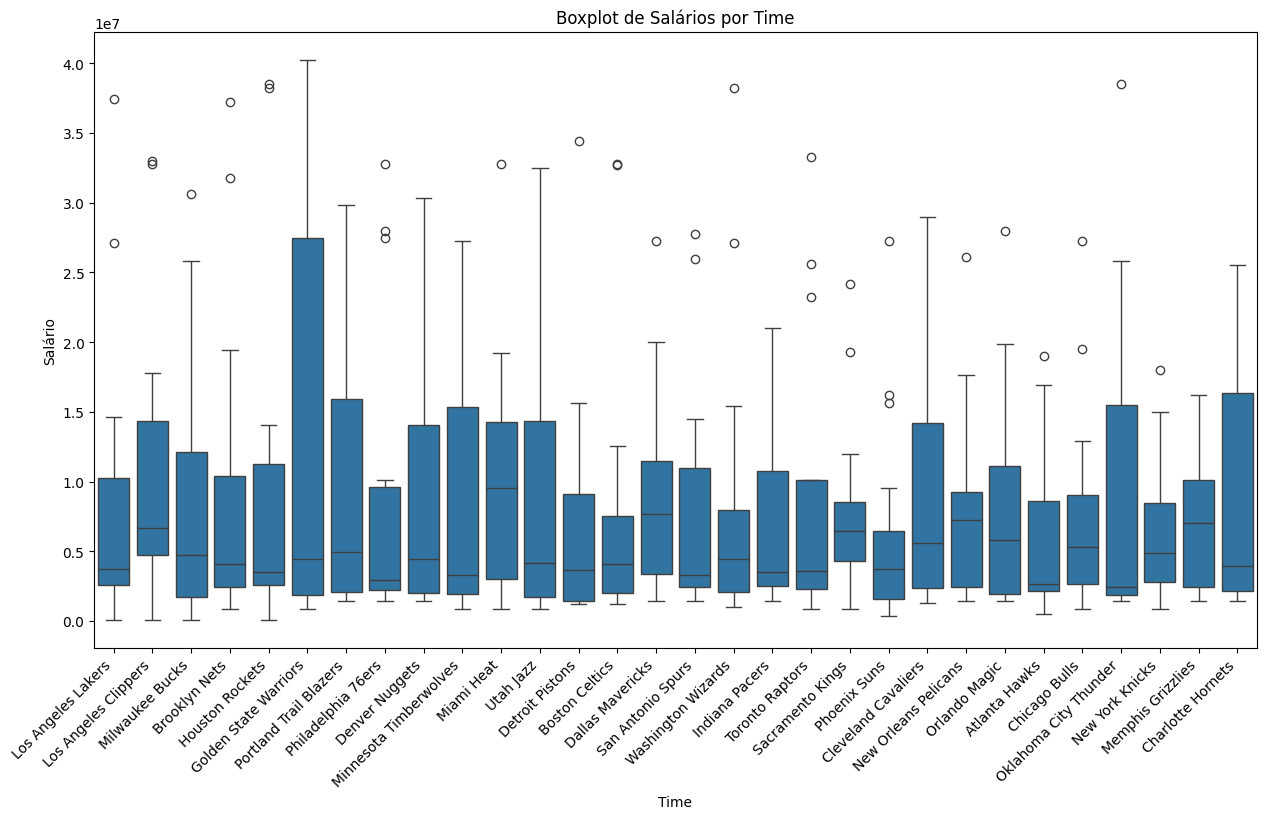

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='team', y='salary', data=df_nba_tratado)
plt.title('Boxplot de Salários por Time')
plt.xlabel('Time')
plt.ylabel('Salário')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Salário máximo, mínimo e mediano
max_salary = df_nba_tratado['salary'].max()
min_salary = df_nba_tratado['salary'].min()
median_salary = df_nba_tratado['salary'].median()

print(f'Salário Máximo: {max_salary}')
print(f'Salário Mínimo: {min_salary}')
print(f'salario median: {median_salary}')

Salário Máximo: 40231758.0
Salário Mínimo: 50000.0
salario median: 4380120.0


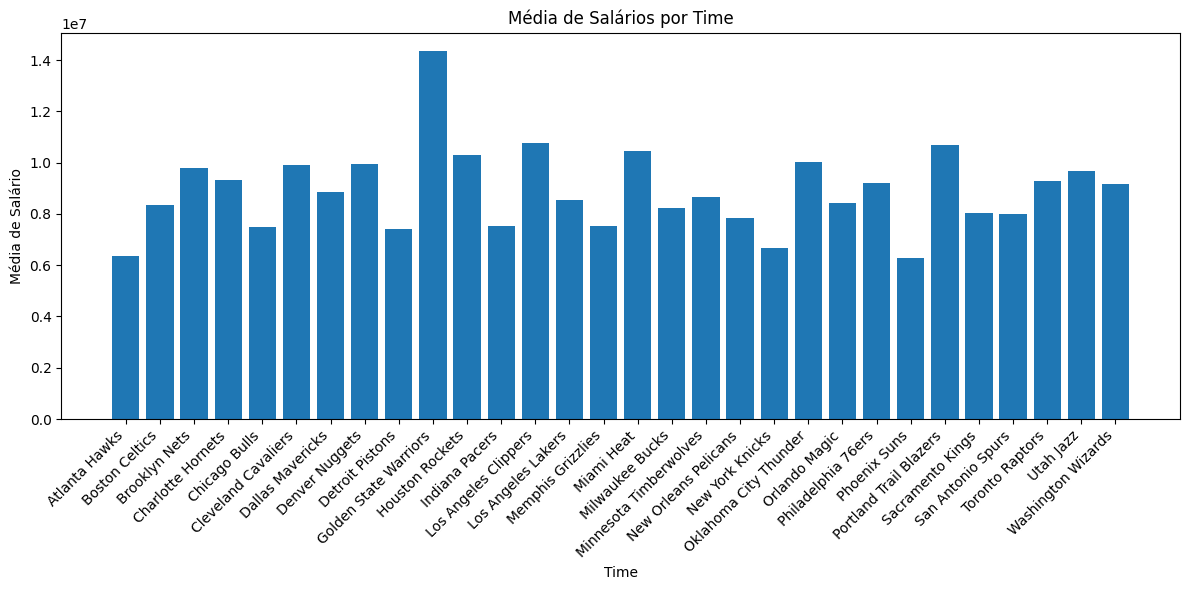

In [ ]:
# Agrupar por time e calcular a média dos salários
media_salarios_por_time = df_nba_tratado.groupby('team')['salary'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_salarios_por_time.index, media_salarios_por_time.values)
plt.title('Média de Salários por Time')
plt.xlabel('Time')
plt.ylabel('Média de Salário')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


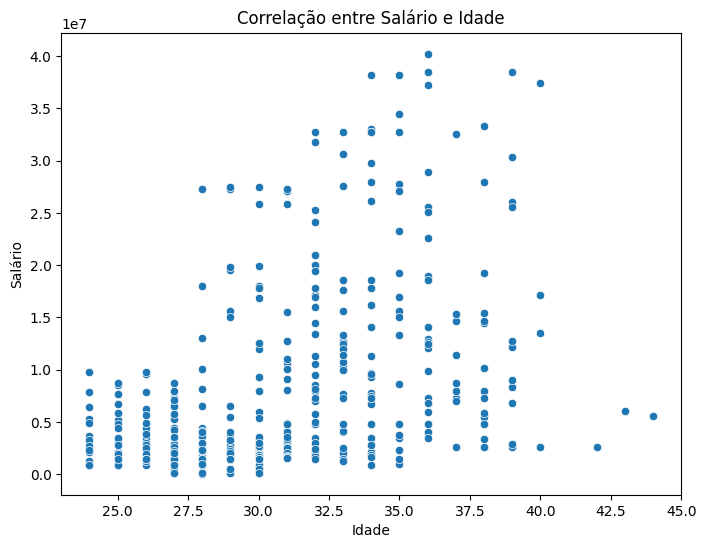

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Idade', y='salary', data=df_nba_tratado)
plt.title('Correlação entre Salário e Idade')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()


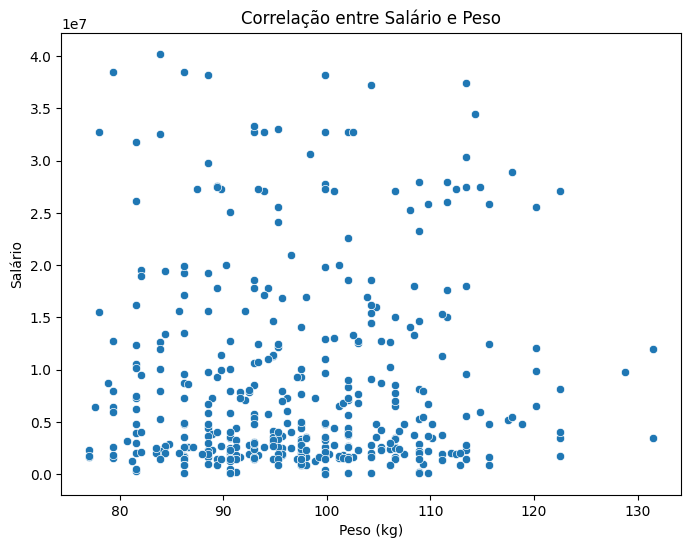

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='peso_kg', y='salary', data=df_nba_tratado)
plt.title('Correlação entre Salário e Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Salário')
plt.show()


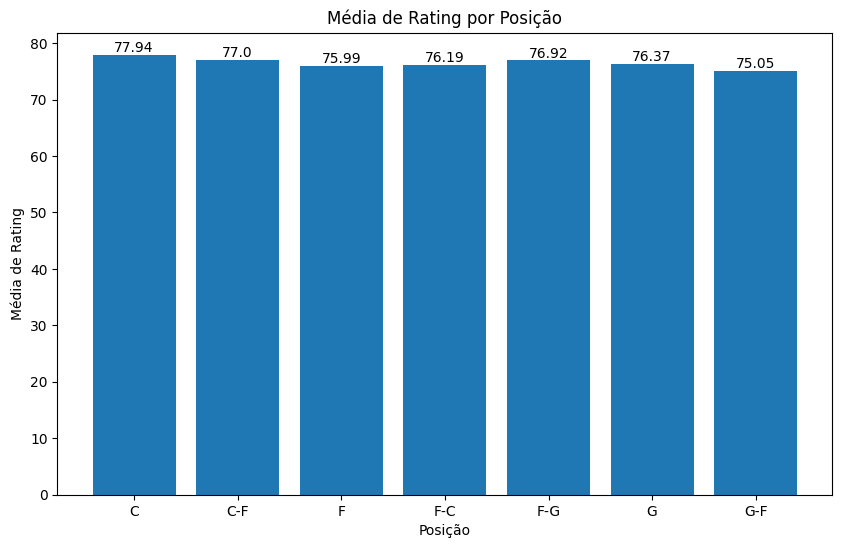

In [ ]:
# Calcular a média de rating por posição
media_rating_por_posicao = df_nba_tratado.groupby('position')['rating'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(media_rating_por_posicao.index, media_rating_por_posicao.values)
plt.title('Média de Rating por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Rating')

# Adicionar os valores no topo das barras
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


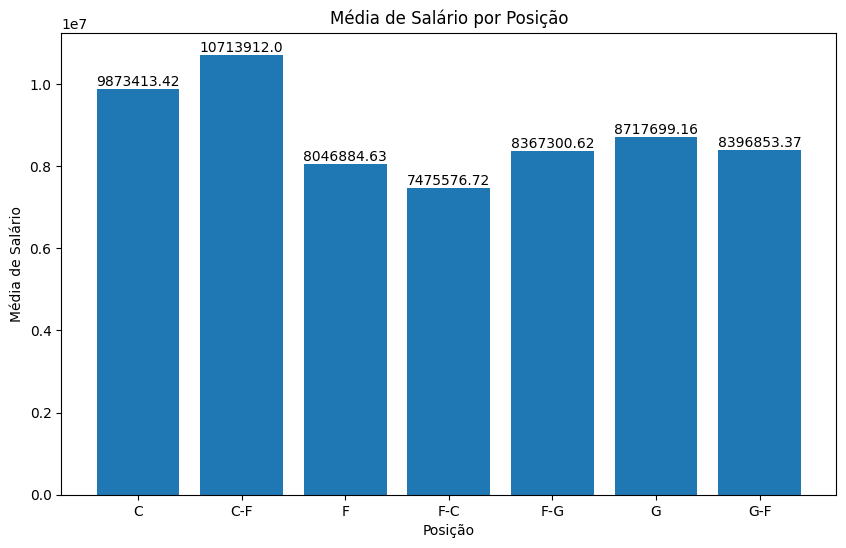

In [ ]:
# Calcular a média de salário por posição
media_salario_por_posicao = df_nba_tratado.groupby('position')['salary'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(media_salario_por_posicao.index, media_salario_por_posicao.values)
plt.title('Média de Salário por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Salário')

# Adicionar os valores no topo das barras
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


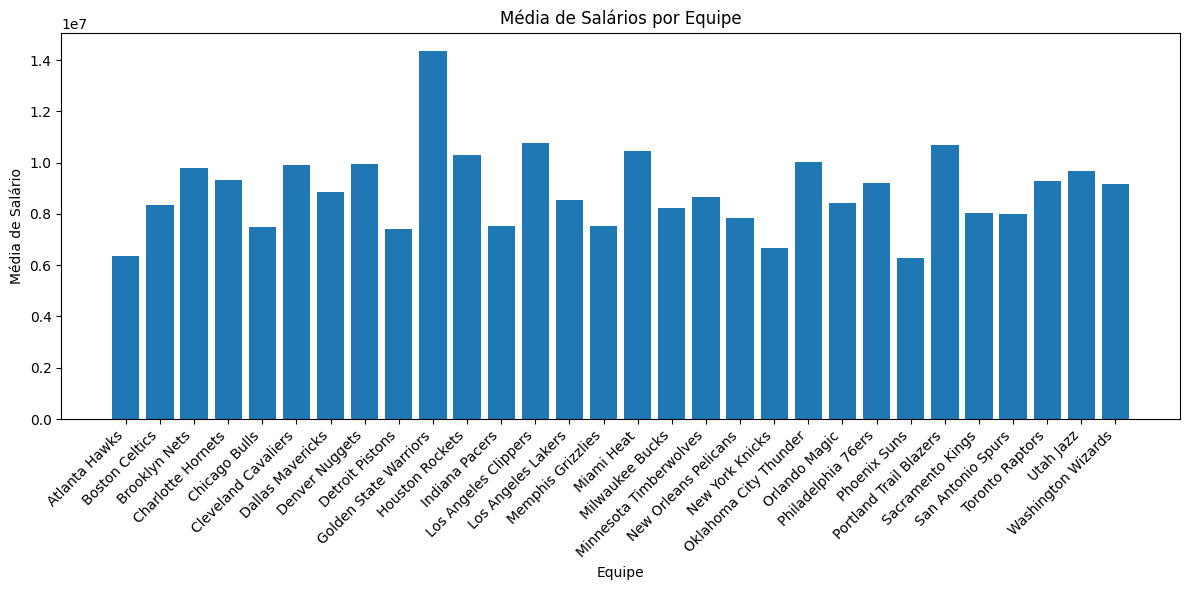

In [ ]:
# prompt: use df_nba_tratado e crie um gráfico de salário médio por equipe

import matplotlib.pyplot as plt

# Agrupar por equipe e calcular a média dos salários
media_salarios_por_equipe = df_nba_tratado.groupby('team')['salary'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_salarios_por_equipe.index, media_salarios_por_equipe.values)
plt.title('Média de Salários por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Média de Salário')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


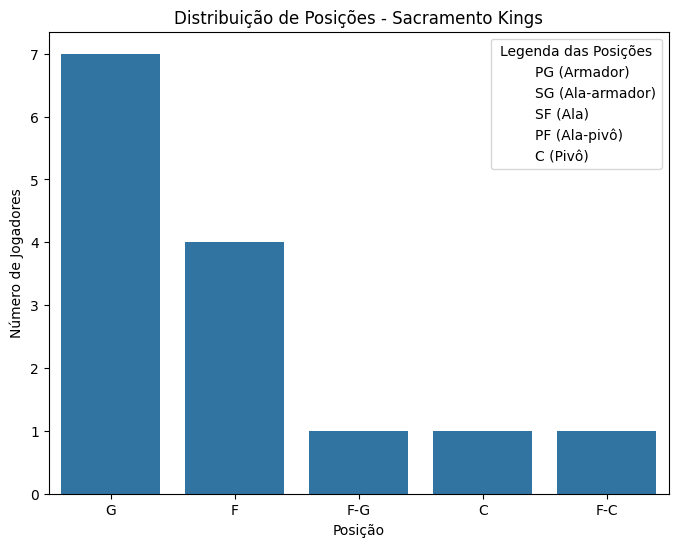

In [ ]:
# Filtrar os jogadores do Sacramento Kings
kings_players = df_nba_tratado[df_nba_tratado['team'] == 'Sacramento Kings']

# Criar o gráfico de distribuição de posições
plt.figure(figsize=(8, 6))
sns.countplot(x='position', data=kings_players)
plt.title('Distribuição de Posições - Sacramento Kings')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')

# Criar um dicionário para mapear as posições para suas traduções em português
position_mapping = {
    'PG': 'Armador',
    'SG': 'Ala-armador',
    'SF': 'Ala',
    'PF': 'Ala-pivô',
    'C': 'Pivô'
}

# Adicionar a legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{pos} ({mapping})', markersize=10)
           for pos, mapping in position_mapping.items()]

plt.legend(handles=handles, title='Legenda das Posições', loc='upper right')

plt.show()
